In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Original data set http://people.sc.fsu.edu/~jburkardt/datasets/regression/x03.txt

In [3]:
!cat data.txt

#  x03.txt
#
#  Reference:
#
#    Helmut Spaeth,
#    Mathematical Algorithms for Linear Regression,
#    Academic Press, 1991, page 304,
#    ISBN 0-12-656460-4.
#
#    D G Kleinbaum and L L Kupper,
#    Applied Regression Analysis and Other Multivariable Methods,
#    Duxbury Press, 1978, page 47.
#
#  Discussion:
#
#    The systolic blood pressure was measured for 30 people of
#    different ages.  A nonzero intercept seems appropriate
#    here, since even a very young person can have a high blood pressure.
#
#    There are 30 rows of data.  The data columns include:
#
#      I,  the index;
#      A0, 1,
#      A1, the age;
#      B,  the systolic blood pressure.
#
#    We seek a model of the form:
#
#      B = A0 * X0 + A1 * X1
#
4 columns
30 rows
Index
One
Age
Systolic Blood Pressure
 1  1  39  144
 2  1  47  220
 3  1  45  138
 4  1  47  145
 5  1  65  162
 6  1  46  142
 7  1  67  170
 8  1  42  124
 9  1  67  158
10  1  56  154
11  1  64  162
12  1  56  150
13  1  59  140
14  

In [4]:
with open('data.txt','r') as file:
    original = file.readlines()
    print(original)
    l = [e.strip('\n').strip().split(' ') for e in original if e[0] is not '#']
    print(l)

['#  x03.txt\n', '#\n', '#  Reference:\n', '#\n', '#    Helmut Spaeth,\n', '#    Mathematical Algorithms for Linear Regression,\n', '#    Academic Press, 1991, page 304,\n', '#    ISBN 0-12-656460-4.\n', '#\n', '#    D G Kleinbaum and L L Kupper,\n', '#    Applied Regression Analysis and Other Multivariable Methods,\n', '#    Duxbury Press, 1978, page 47.\n', '#\n', '#  Discussion:\n', '#\n', '#    The systolic blood pressure was measured for 30 people of\n', '#    different ages.  A nonzero intercept seems appropriate\n', '#    here, since even a very young person can have a high blood pressure.\n', '#\n', '#    There are 30 rows of data.  The data columns include:\n', '#\n', '#      I,  the index;\n', '#      A0, 1,\n', '#      A1, the age;\n', '#      B,  the systolic blood pressure.\n', '#\n', '#    We seek a model of the form:\n', '#\n', '#      B = A0 * X0 + A1 * X1\n', '#\n', '4 columns\n', '30 rows\n', 'Index\n', 'One\n', 'Age\n', 'Systolic Blood Pressure\n', ' 1  1  39  144\n'

In [5]:
df = pd.DataFrame(l)

In [6]:
df

,0,1,2,3,4,5,6
0,4,columns,None,None,None,None,None
1,30,rows,None,None,None,None,None
2,Index,None,None,None,None,None,None
3,One,None,None,None,None,None,None
4,Age,None,None,None,None,None,None
5,Systolic,Blood,Pressure,None,None,None,None
6,1,,1,,39,,144
7,2,,1,,47,,220
8,3,,1,,45,,138
9,4,,1,,47,,145


In [7]:
df = df.drop([0,1,3,5],axis=1).drop(range(6))

In [8]:
df = df.reset_index().drop('index',axis=1)

In [9]:
df

,2,4,6
0,1,39,144
1,1,47,220
2,1,45,138
3,1,47,145
4,1,65,162
5,1,46,142
6,1,67,170
7,1,42,124
8,1,67,158
9,1,56,154


In [10]:
df.columns=['intercept','age','bp']

In [11]:
df['age']

0     39
1     47
2     45
3     47
4     65
5     46
6     67
7     42
8     67
9     56
10    64
11    56
12    59
13    34
14    42
15    48
16    45
17    17
18    20
19    19
20    36
21    50
22    39
23    21
24    44
25    53
26    63
27    29
28    25
29    69
Name: age, dtype: object

In [12]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col])

In [13]:
df.head()

,intercept,age,bp
0,1,39,144
1,1,47,220
2,1,45,138
3,1,47,145
4,1,65,162


In [14]:
x=df['age'].values
y=df['bp'].values

In [15]:
def plot_lr(x,y,beta0=None,beta1=None):
    plt.figure()
    plt.xticks(np.arange(min(x), max(x)+1, 5))
    plt.yticks(np.arange(min(y), max(y)+1, 10))
    plt.xlabel('Age')
    plt.ylabel('Blood Pressure')
    plt.scatter(x,y)
    if beta0 and beta1:
        plt.plot(x,beta0+beta1*x,c='red')
        plt.title('Coefficients: beta0 = {b0:.{d}f}, beta1 = {b1:.{d}f}'.format(b0=beta0, b1=beta1, d=1));
    

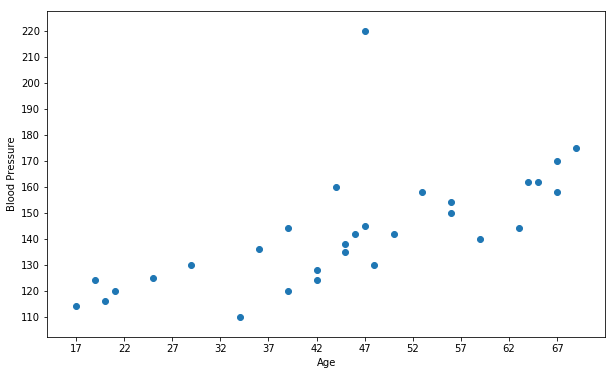

In [16]:
plot_lr(x,y)

# Linear Regression: Ordinary Least Squares

In [17]:
# Normal Equations

X = df[['intercept','age']].values

In [18]:
W1 = np.linalg.inv(X.T.dot(X))
W2 = np.matmul(X.T,y)
W = np.matmul(W1, W2)

In [19]:
W

array([ 98.71471814,   0.97087035])

In [20]:
beta0 = W[0]
beta1 = W[1]

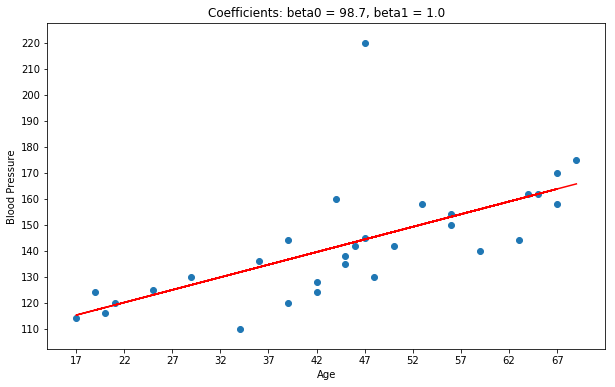

In [21]:
plot_lr(x,y,beta0,beta1)

# Gradient Descent

#### Hyperparameters: Arbitrarily chosen by user before training

In [22]:
beta_init = np.array([0.1, 0.2]) # initialize the weights
alpha = 10**-4 # set a learning rate

**Gradient Descent algorithm**

Mean Squared Error

$MSE =  \frac{1}{m}\sum_i^m (y_i - \hat{y}_i)^2 = \frac{1}{m}\sum_i^m (y_i - X_i\hat{\beta} )^2$

Gradient w.r.t. $\beta$

$\nabla_{beta} = \frac{2}{m}\sum_i^n X^T(y_i - X_i\hat{\beta} )$



Update rule

$\beta_{new} = \beta_{old} - \alpha \nabla_{beta}$    i.e. step in the negative gradient direcation

In [23]:
def calc_cost(X,y,beta):
    mse = 1/m*sum((y-X.dot(beta))**2)
    return(mse)

In [24]:
beta_test = np.array([np.ones(1000),np.linspace(-100,100,1000)])

In [25]:
m = len(y)

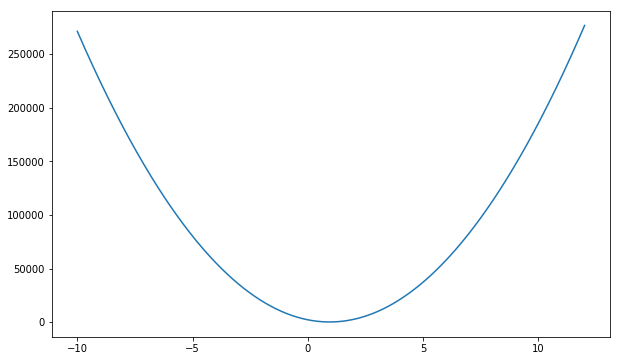

In [26]:
costs = np.zeros(1000)
beta1s = np.linspace(-10,12,1000)
beta0_test = 100
for i in range(1000):
    costs[i]=calc_cost(X,y,np.array([beta0_test,beta1s[i]]))

plt.plot(beta1s,costs);

In [27]:
calc_cost(X,y,beta_init)

18211.487333333334

In [28]:
n = len(y)

In [29]:
iterations = range(300000)
cost_history = np.zeros(len(iterations))

beta = beta_init

for i in iterations:
    cost_history[i] = calc_cost(X,y,beta)
    gradient = 2/m*X.T.dot(X.dot(beta)-y)
    beta = beta - alpha *gradient

In [30]:
beta

array([ 98.4685563 ,   0.97577974])

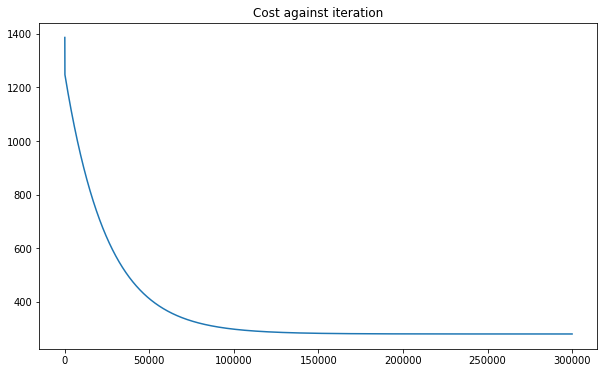

In [36]:
plt.title('Cost against iteration')
plt.plot(range(4,300000), cost_history[4:300000]);

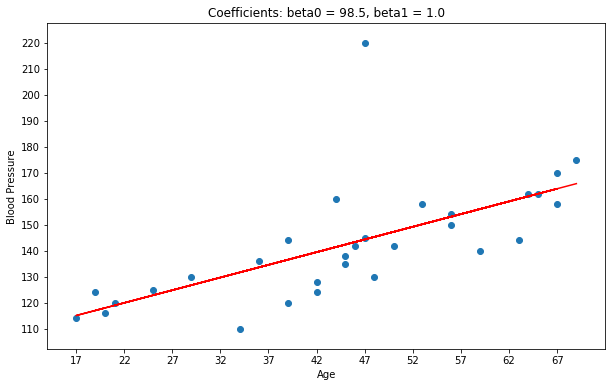

In [37]:
plot_lr(x,y,beta0=beta[0],beta1=beta[1])

# Singular Matrix w Gradient Descent

In [38]:
X2 = np.hstack([X,X[:,1].reshape(-1,1)])

In [39]:
X2

array([[ 1, 39, 39],
       [ 1, 47, 47],
       [ 1, 45, 45],
       [ 1, 47, 47],
       [ 1, 65, 65],
       [ 1, 46, 46],
       [ 1, 67, 67],
       [ 1, 42, 42],
       [ 1, 67, 67],
       [ 1, 56, 56],
       [ 1, 64, 64],
       [ 1, 56, 56],
       [ 1, 59, 59],
       [ 1, 34, 34],
       [ 1, 42, 42],
       [ 1, 48, 48],
       [ 1, 45, 45],
       [ 1, 17, 17],
       [ 1, 20, 20],
       [ 1, 19, 19],
       [ 1, 36, 36],
       [ 1, 50, 50],
       [ 1, 39, 39],
       [ 1, 21, 21],
       [ 1, 44, 44],
       [ 1, 53, 53],
       [ 1, 63, 63],
       [ 1, 29, 29],
       [ 1, 25, 25],
       [ 1, 69, 69]])

In [40]:
def gd(X,y,beta=beta_init):
    iterations = range(300000)
    cost_history = np.zeros(len(iterations))

    for i in iterations:
        cost_history[i] = calc_cost(X,y,beta)
        gradient = 2/n*X.T.dot(X.dot(beta)-y)
        beta = beta - alpha *gradient
    return(beta)

In [41]:
gd(X2,y,beta=np.array([0.1,.1,.1]))

array([ 98.46878136,   0.48788757,   0.48788757])

In [42]:
np.linalg.inv(X2.T.dot(X2))

LinAlgError: Singular matrix

In [ ]:
# However, Moore-Penrose pseudo inverse works!
np.linalg.pinv(X2.T.dot(X2))

In [ ]:
# pseudo inverse
W1 = np.linalg.pinv(X2.T.dot(X2))
W2 = X2.T.dot(y)
W1.dot(W2)

# Experiment with the Sigmoid function model parameters

In [151]:
beta0 = 0
beta1 = 1
x = np.linspace(-10,10,100)

In [152]:
t=beta0+beta1*x

In [153]:
sig = 1/(1+np.exp(-t))

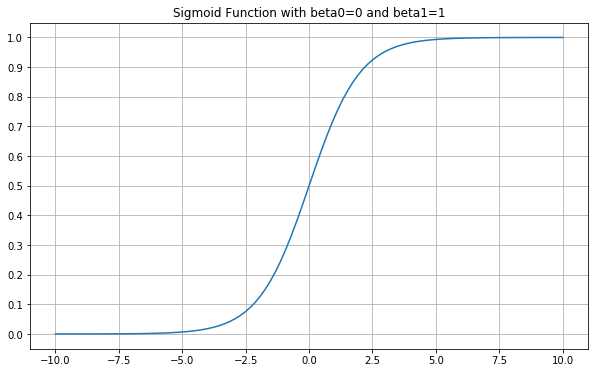

In [154]:
plt.grid()
plt.title('Sigmoid Function with beta0={} and beta1={}'.format(beta0,beta1))
plt.yticks(np.linspace(0,1,11))
plt.plot(x,sig);

**Note:** Cut off, where sig = 0.5 is $\frac{-\beta_0}{\beta_1}$

# Logistic Regression Example with scikit-learn

In [83]:
from sklearn import datasets

In [84]:
data = datasets.load_iris()

In [85]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [86]:
X = data['data']

In [87]:
X_df = pd.DataFrame(X[:,2:], columns=data['feature_names'][2:])

In [88]:
y=data['target']

In [89]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [90]:
y = (y==2).astype(int) # if Virginica

In [91]:
y_df = pd.DataFrame(y)

In [92]:
X_df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


In [93]:
from sklearn.linear_model import LogisticRegression

In [97]:
logreg = LogisticRegression(C=400) #instantiate

In [98]:
logreg.fit(X,y) # fit model

LogisticRegression(C=400, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [117]:
print('Accuracy on training set: '+str(np.round(sum(logreg.predict(X)==y)/len(y)*100,1))+'%')

Accuracy on training set: 98.7%
